# Bayesianness

Importing the necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize

Code used to fit a model to data I nicked from a previous bit of work I did.

In [2]:
def Model(x, m, c):
    return m*x + c

def Minimise_m(m, Data_x, Data_y, c):
    Running_total = 0
    for n in range(len(Data_x)):
        Running_total += (Data_y[n] - Model(Data_x[n], m, c))**2
    return Running_total

def Minimise_c(c, Data_x, Data_y, m):
    Running_total = 0
    for n in range(len(Data_x)):
        Running_total += (Data_y[n] - Model(Data_x[n], m, c))**2
    return Running_total

Creating a random set of numbers normally distributed and inputting it into y. A model is then created for this set of data.

In [3]:
x = np.random.randn(20)
m, c = 2, 3
noise = np.random.randn(20)
y = Model(x, m, c + noise)

In [4]:
m_result = minimize(Minimise_m, 0, args=(x, y, c)).x
c_result = minimize(Minimise_c, 0, args=(x, y, m)).x
params = [m_result, c_result]

In [5]:
Output_x = np.linspace(min(x), max(x), 1000)
Output_y = Model(Output_x, *params)

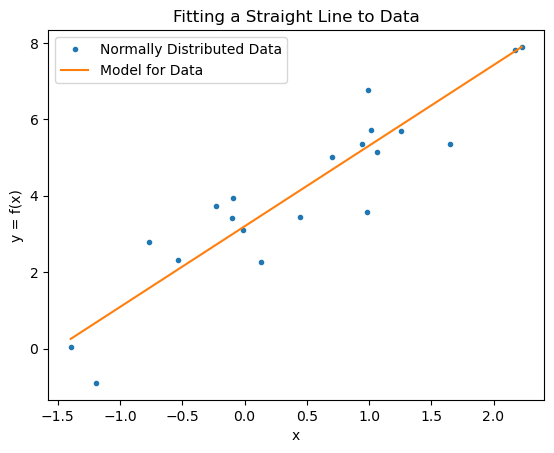

In [6]:
plt.figure()
plt.plot(x, y, '.', label='Normally Distributed Data')
plt.plot(Output_x, Output_y, label='Model for Data')
plt.title('Fitting a Straight Line to Data')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.legend()
plt.show()